In [2]:
pip install tensorflow


     -------------------------------------- 276.5/276.5 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.7 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 6.9 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     -------------------------------------- 242.5/242.5 kB 4.9 M


[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\kaveri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [4]:
pip install plotly

     ---------------------------------------- 15.5/15.5 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: C:\Users\kaveri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [5]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [7]:
df=pd.read_csv(r"C:\Users\kaveri\OneDrive\Desktop\googlestock_price.csv")

In [8]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,02-01-2013,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,03-01-2013,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,04-01-2013,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,07-01-2013,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,08-01-2013,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [9]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
2531,2531,23-01-2023,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,2532,24-01-2023,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,2533,25-01-2023,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,2534,26-01-2023,96.500000,97.570000,95.379997,97.519997,97.519997,30114000
2535,2535,27-01-2023,97.309998,100.320000,97.309998,99.370003,99.370003,33850200


In [10]:
df = df.loc[~df.index.duplicated(keep='first')]

In [11]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  2536
Total number of fields present in the dataset:  8


In [12]:
df.shape

(2536, 8)

In [13]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,02-01-2013,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,1,03-01-2013,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,2,04-01-2013,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,3,07-01-2013,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,4,08-01-2013,18.406906,18.425926,18.128880,18.350851,18.350851,66976956


In [14]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2013,18.003504,18.193193,17.931683,18.099348,18.099348,101550348
1,03-01-2013,18.141392,18.316566,18.036036,18.109859,18.109859,92635272
2,04-01-2013,18.251753,18.555305,18.210211,18.467718,18.467718,110429460
3,07-01-2013,18.404655,18.503002,18.282784,18.387136,18.387136,66161772
4,08-01-2013,18.406906,18.425926,18.128880,18.350851,18.350851,66976956
...,...,...,...,...,...,...,...
2531,23-01-2023,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,24-01-2023,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,25-01-2023,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,26-01-2023,96.500000,97.570000,95.379997,97.519997,97.519997,30114000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536 entries, 0 to 2535
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2536 non-null   object 
 1   Open       2536 non-null   float64
 2   High       2536 non-null   float64
 3   Low        2536 non-null   float64
 4   Close      2536 non-null   float64
 5   Adj Close  2536 non-null   float64
 6   Volume     2536 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 158.5+ KB


In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2.536000e+03
mean,59.746815,60.350351,59.126071,59.752340,59.752340,4.277325e+07
std,34.629696,35.037901,34.204419,34.622387,34.622387,2.692419e+07
min,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06
25%,30.427364,30.636137,30.285035,30.470658,30.470658,2.686500e+07
50%,52.257750,52.703001,51.505501,52.189501,52.189501,3.436300e+07
75%,74.542501,75.379124,73.883247,74.422125,74.422125,4.887500e+07
max,151.250000,151.546493,148.899002,149.838501,149.838501,4.621933e+08


In [18]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [19]:
print('NA values:',df.isnull().values.any())

NA values: False


In [20]:
df.shape

(2536, 7)

In [21]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 02-01-2013
Ending Date 27-01-2023


In [22]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2536, 2)


In [23]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Google Stock close price 2013-023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [24]:
closedf = closedf[closedf['Date'] > '2021-01-31']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  864


In [25]:
closedf

,Date,Close
13,22-01-2013,17.589338
14,23-01-2013,18.556055
15,24-01-2013,18.874125
16,25-01-2013,18.860611
17,28-01-2013,18.787037
...,...,...
2531,23-01-2023,99.790001
2532,24-01-2023,97.699997
2533,25-01-2023,95.220001
2534,26-01-2023,97.519997


In [26]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Google Stock close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [27]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(864, 1)


In [28]:
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (604, 1)
test_data:  (260, 1)


In [29]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (578, 25)
y_train:  (578,)
X_test:  (234, 25)
y_test (234,)


In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (578, 25, 1)
X_test:  (234, 25, 1)


In [32]:
model=Sequential()

model.add(LSTM(128,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [34]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=220,batch_size=32,verbose=1)


Epoch 1/220
19/19 [==============================] - 4s 65ms/step - loss: 0.0145 - val_loss: 0.0138
Epoch 2/220
19/19 [==============================] - 1s 36ms/step - loss: 0.0019 - val_loss: 0.0082
Epoch 3/220
19/19 [==============================] - 1s 36ms/step - loss: 5.6030e-04 - val_loss: 0.2433
Epoch 4/220
19/19 [==============================] - 1s 37ms/step - loss: 3.2875e-04 - val_loss: 0.1288
Epoch 5/220
19/19 [==============================] - 1s 42ms/step - loss: 2.8559e-04 - val_loss: 0.1418
Epoch 6/220
19/19 [==============================] - 1s 40ms/step - loss: 3.5753e-04 - val_loss: 0.0619
Epoch 7/220
19/19 [==============================] - 1s 42ms/step - loss: 2.8509e-04 - val_loss: 0.0676
Epoch 8/220
19/19 [==============================] - 1s 41ms/step - loss: 2.6747e-04 - val_loss: 0.0443
Epoch 9/220
19/19 [==============================] - 1s 42ms/step - loss: 2.5648e-04 - val_loss: 0.0732
Epoch 10/220
19/19 [==============================] - 1s 42ms/step - los

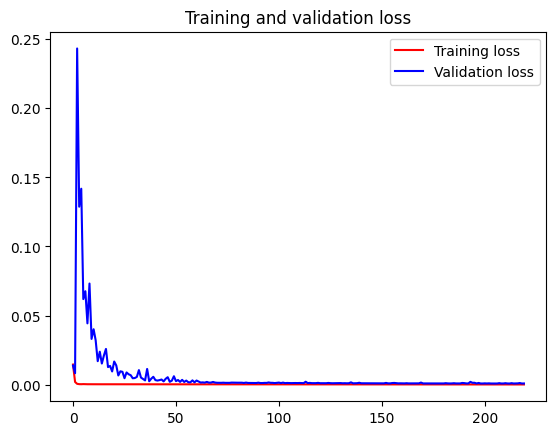

<Figure size 640x480 with 0 Axes>

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()


In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

8/8 [==============================] - 0s 13ms/step


((578, 1), (234, 1))

In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [38]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1.2348786770158497
Train data MSE:  1.5249253469484154
Train data MAE:  0.8372993070931972
-------------------------------------------------------------------------------------
Test data RMSE:  3.774340891066376
Test data MSE:  14.245649161975726
Test data MAE:  2.6776502568005474


In [39]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9918164017853107
Test data explained variance regression score: 0.9756777549761578


In [40]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9915131908283779
Test data R2 score: 0.9745950042352475


In [41]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0008267929353232474
Test data MGD:  0.0012360390684752372
----------------------------------------------------------------------
Train data MPD:  0.03359457511634987
Test data MPD:  0.12958648803117762


In [42]:
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between Google Stock original close price vs Google Stock predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (864, 1)
Test predicted data:  (864, 1)


In [43]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
             
print("Output of predicted next days: ", len(lst_output))             

Output of predicted next days:  30


In [44]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
[26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55]


In [45]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [46]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing Google Stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()